# Food Project v1 - Small DNN model made from scratch

In [42]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input, BatchNormalization, Activation
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras.models import Model

In [43]:
# Build a Small Convnet from scratch

img_input = Input(shape=(224, 224, 3))

# Conv2D: data_format = "channels_last" (shape = (batch, height, width, channels))
# conv layer 1
x = Conv2D(16, 3, padding='same')(img_input)
x = BatchNormalization(axis = 3, name = 'bn0')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
# 112 * 112 * 16

# conv layer 2
x = Conv2D(32, 3, padding='same')(x)
#x = BatchNormalization(axis = 3, name = 'bn1')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
# 56 * 56 * 32

# conv layer 3
x = Conv2D(64, 3, padding='same')(x)
#x = BatchNormalization(axis = 3, name = 'bn2')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
# 28 * 28 * 64

# conv layer 4
x = Conv2D(128, 3, padding='same')(x)
#x = BatchNormalization(axis = 3, name = 'bn3')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)
# 14 * 14 * 128

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [44]:
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 224, 224, 16)      64        
_________________________________________________________________
activation_10 (Activation)   (None, 224, 224, 16)      0         
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
activation_11 (Activation)   (None, 112, 112, 32)      0   

In [45]:
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

## Load data

In [46]:
from keras.preprocessing.image import ImageDataGenerator
import os

batch_size = 32

train_dir = os.path.join(os.getcwd(), 'train')
valid_dir = os.path.join(os.getcwd(), 'valid')
test_dir = os.path.join(os.getcwd(), 'test')

num_samples_train = len(os.listdir(train_dir))
num_samples_valid = len(os.listdir(valid_dir))
num_samples_test = len(os.listdir(test_dir))

In [47]:

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')

valid_generator = valid_datagen.flow_from_directory(
    valid_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')


Found 8211 images belonging to 2 classes.
Found 1028 images belonging to 2 classes.


## Training

In [48]:
from math import ceil
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

epochs=200

history = model.fit_generator(
    train_generator, steps_per_epoch=ceil(num_samples_train / batch_size), epochs=epochs, 
    validation_data=valid_generator, validation_steps=ceil(num_samples_valid / batch_size),
    verbose=2)

Epoch 1/200
 - 2s - loss: 0.7276 - acc: 0.2812 - val_loss: 7.0968 - val_acc: 0.5312
Epoch 2/200
 - 0s - loss: 6.8120 - acc: 0.5312 - val_loss: 2.4372 - val_acc: 0.7500
Epoch 3/200
 - 0s - loss: 4.9713 - acc: 0.4375 - val_loss: 0.5443 - val_acc: 0.6562
Epoch 4/200
 - 0s - loss: 0.6624 - acc: 0.5938 - val_loss: 1.0056 - val_acc: 0.5312
Epoch 5/200
 - 0s - loss: 1.6724 - acc: 0.2500 - val_loss: 0.7067 - val_acc: 0.6875
Epoch 6/200
 - 0s - loss: 0.5346 - acc: 0.7500 - val_loss: 0.6121 - val_acc: 0.6875
Epoch 7/200
 - 0s - loss: 0.5393 - acc: 0.8125 - val_loss: 0.6646 - val_acc: 0.5312
Epoch 8/200
 - 0s - loss: 0.6180 - acc: 0.6250 - val_loss: 0.7075 - val_acc: 0.5312
Epoch 9/200
 - 0s - loss: 0.6751 - acc: 0.5312 - val_loss: 0.6544 - val_acc: 0.6562
Epoch 10/200
 - 0s - loss: 0.6410 - acc: 0.5938 - val_loss: 0.6310 - val_acc: 0.6250
Epoch 11/200
 - 0s - loss: 0.5759 - acc: 0.6562 - val_loss: 0.6353 - val_acc: 0.6562
Epoch 12/200
 - 0s - loss: 0.5647 - acc: 0.7188 - val_loss: 0.5568 - val_a

Epoch 98/200
 - 0s - loss: 0.4495 - acc: 0.7500 - val_loss: 0.4732 - val_acc: 0.7500
Epoch 99/200
 - 0s - loss: 0.3326 - acc: 0.9062 - val_loss: 0.3182 - val_acc: 0.7500
Epoch 100/200
 - 0s - loss: 0.4984 - acc: 0.8125 - val_loss: 0.3459 - val_acc: 0.8125
Epoch 101/200
 - 0s - loss: 0.2374 - acc: 0.8750 - val_loss: 0.3549 - val_acc: 0.8750
Epoch 102/200
 - 0s - loss: 0.3113 - acc: 0.8750 - val_loss: 0.4511 - val_acc: 0.7188
Epoch 103/200
 - 0s - loss: 0.4249 - acc: 0.8125 - val_loss: 0.1917 - val_acc: 0.9062
Epoch 104/200
 - 0s - loss: 0.3487 - acc: 0.8438 - val_loss: 0.4306 - val_acc: 0.7500
Epoch 105/200
 - 0s - loss: 0.4339 - acc: 0.8125 - val_loss: 0.3740 - val_acc: 0.9062
Epoch 106/200
 - 0s - loss: 0.3863 - acc: 0.8750 - val_loss: 0.6891 - val_acc: 0.6562
Epoch 107/200
 - 0s - loss: 0.1787 - acc: 0.9062 - val_loss: 0.9024 - val_acc: 0.6250
Epoch 108/200
 - 0s - loss: 0.5731 - acc: 0.8750 - val_loss: 0.5142 - val_acc: 0.8125
Epoch 109/200
 - 0s - loss: 0.2608 - acc: 0.8438 - val_l

Epoch 194/200
 - 0s - loss: 0.3359 - acc: 0.8750 - val_loss: 0.5490 - val_acc: 0.7500
Epoch 195/200
 - 0s - loss: 0.1469 - acc: 0.9062 - val_loss: 0.2999 - val_acc: 0.8750
Epoch 196/200
 - 0s - loss: 0.3481 - acc: 0.8125 - val_loss: 0.1989 - val_acc: 0.9062
Epoch 197/200
 - 0s - loss: 0.6107 - acc: 0.7188 - val_loss: 0.3161 - val_acc: 0.9062
Epoch 198/200
 - 0s - loss: 0.3806 - acc: 0.8125 - val_loss: 0.0995 - val_acc: 1.0000
Epoch 199/200
 - 0s - loss: 0.2830 - acc: 0.9062 - val_loss: 0.3185 - val_acc: 0.8438
Epoch 200/200
 - 0s - loss: 0.2538 - acc: 0.9062 - val_loss: 0.2401 - val_acc: 0.9375


Text(0.5, 1.0, 'Training and validation accuracy')

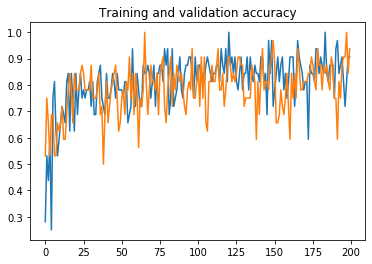

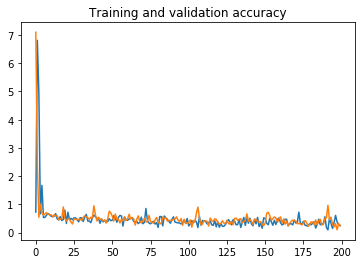

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']


loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc,)
plt.title("Training and validation accuracy")

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss,)
plt.title("Training and validation accuracy")

In [50]:
print(model.metrics_names)

['loss', 'acc']


In [51]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='binary')

ret_eval = model.evaluate_generator(test_generator, steps=ceil(num_samples_test / batch_size), verbose=2)

print("loss = {}".format(ret_eval[0]))
print("accuracy = {}".format(ret_eval[1]))

Found 1026 images belonging to 2 classes.
loss = 0.3956158757209778
accuracy = 0.8125
